# 4.7 Exercises
For help with exercises, please visit the [site](http://www.wiley.com/college/goodrich).
### Reinforcement

__R-4.1__ Describe a recursive algorithm for finding the maximum element in a sequence, S, of n elements. What is your running time and space usage?

In [1]:
def recursive_max(arr, maximum=None):
    if len(arr) == 0:
        return maximum
    if maximum == None:
        return recursive_max(arr[1:], maximum=arr[0])
    else:
        new_max = maximum if maximum > arr[0] else arr[0]
        return recursive_max(arr[1:], maximum=new_max)
    
assert recursive_max(arr=[100,20,34,33,12,78,43,3,200]) == 200

The time complaxity is $O(n)$. Space complexity is the same as different segments of the array are not regenerated, but accessed by the function.

__R-4.2__ Draw the recursion trace for the computation of power(2, 5), using the
traditional function implemented in Code Fragment 4.11.

In [2]:
def power(n, m, trace=False):
    if m == 0:
        return 1
    if trace:
        print(f"power({n},{m-1})")
    return n * power(n, m-1, trace=trace)
power(2,5, trace=True)

power(2,4)
power(2,3)
power(2,2)
power(2,1)
power(2,0)


32

__R-4.3__ Draw the recursion trace for the computation of power(2, 18), using the repeated squaring algorithm, as implemented in Code Fragment 4.12.

In [3]:
power(2,18,trace=True)

power(2,17)
power(2,16)
power(2,15)
power(2,14)
power(2,13)
power(2,12)
power(2,11)
power(2,10)
power(2,9)
power(2,8)
power(2,7)
power(2,6)
power(2,5)
power(2,4)
power(2,3)
power(2,2)
power(2,1)
power(2,0)


262144

### Creativity

__C-4.9__ Write a short recursive Python function that finds the minimum and maximum values in a sequence without using any loops.

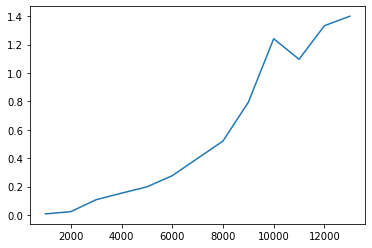

In [4]:
def recursive_min_max(arr, minimum=None, maximum=None):
    if len(arr) == 0:
        return minimum, maximum
    if maximum == None and minimum == None:
        return recursive_min_max(arr[1:], minimum=arr[0], maximum=arr[0])
    else:
        new_max = maximum if maximum > arr[0] else arr[0]
        new_min = minimum if minimum < arr[0] else arr[0]
        return recursive_min_max(arr[1:], minimum=new_min, maximum=new_max)

# Testing and Plotting
from random import randint
import sys
from time import time, sleep
import matplotlib.pyplot as plt
import numpy as np

sys.setrecursionlimit(20000)
run_times = []
loop = list(range(1000,13001, 1000))

for element in loop:
    stime = time()
    recursive_min_max(arr=[randint(1,1e20) for _ in range(int(element))])
    run_times.append(time() - stime)
    #sleep(0.5)
plt.plot(loop, run_times)

In [5]:
run_dict = {k:v for k,v in zip(loop, run_times)}
run_dict

{1000: 0.007462739944458008,
 2000: 0.02341938018798828,
 3000: 0.10762929916381836,
 4000: 0.15361452102661133,
 5000: 0.19789695739746094,
 6000: 0.2766568660736084,
 7000: 0.3988611698150635,
 8000: 0.5206320285797119,
 9000: 0.7940971851348877,
 10000: 1.2416388988494873,
 11000: 1.0970253944396973,
 12000: 1.3334670066833496,
 13000: 1.400087833404541}

__C-4.10__ Describe a recursive algorithm to compute the integer part of the base-two
logarithm of n using only addition and integer division.

In [6]:
def int_log(n):
    if n == 1:
        return 0
    return 1 + int_log(n//2)

# Testing
import math

for i in range(100,15000):
    assert int_log(i) == int(math.log2(i))

__P-4.32__ Implement a recursive function with signature ﬁnd(path, ﬁlename) that reports all entries of the ﬁle system rooted at the given path having the given ﬁle name.

In [7]:
import os

def find(path, filename):
    content = os.listdir(path)
    current = None
    for f in content:
        current = os.path.join(path, f)
        try:
            if os.path.isfile(os.path.join(path, f)) and f == filename:
                print(os.path.join(path, filename))
            elif os.path.isdir(os.path.join(path, f)):
                find(os.path.join(path, f), filename)
                if f == filename:
                    print(os.path.join(path, filename), "/", sep="")
        except PermissionError:
            print("PermissionError occurred in processing:", current)
        except Error:
            print("Error occurred in processing:", current)
            
###

find(".", "README.md")

./README.md


<hr>